In [1]:
import pandas as pd
pixels = pd.read_csv("../image_flat/flattened_images.csv")
train_metadata = pd.read_csv("../train/train_metadata.csv")
merged_df = pixels.merge(train_metadata, on='image_path')
hog_pca = pd.read_csv("../train/Features/hog_pca.csv")
color_hist = pd.read_csv("../train/Features/color_histogram.csv")
additional_features = pd.read_csv("../train/Features/additional_features.csv")
digits = pd.read_csv("../dig_feature/ocr_digit_detection.csv")
cnn = pd.read_csv("../CNN_feature/cnn_features.csv")
# Base dataframe
merged_df = pixels.merge(train_metadata, on='image_path')

# Merge with feature sets (on image_path)
merged_df = merged_df.merge(hog_pca, on='image_path')
merged_df = merged_df.merge(color_hist, on='image_path')
merged_df = merged_df.merge(additional_features, on='image_path')
merged_df = merged_df.merge(digits, on='image_path')
merged_df= merged_df.drop(columns = ['id'])
merged_df = merged_df.merge(cnn, on='image_path')
# display(merged_df)



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = merged_df.drop(['image_path', 'ClassId'], axis=1).values
y = merged_df['ClassId'].values

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
accuracies = []

for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)


    clf = MLPClassifier(hidden_layer_sizes=(500,), max_iter=300, random_state=50)
    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold_idx} Accuracy: {acc:.4f}")


print(f"\nMean CV Accuracy: {np.mean(accuracies):.4f}")
print(f"Std Dev: {np.std(accuracies):.4f}")

Fold 1 Accuracy: 0.9390
Fold 2 Accuracy: 0.9372
Fold 3 Accuracy: 0.9317
Fold 4 Accuracy: 0.9407
Fold 5 Accuracy: 0.9407

Mean CV Accuracy: 0.9379
Std Dev: 0.0034



Fold 1 Accuracy: 0.9390


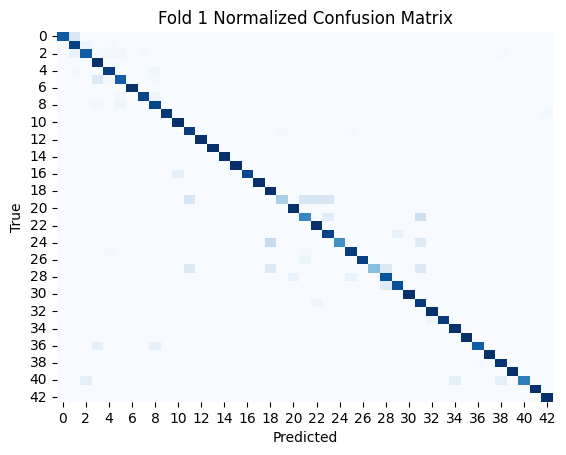

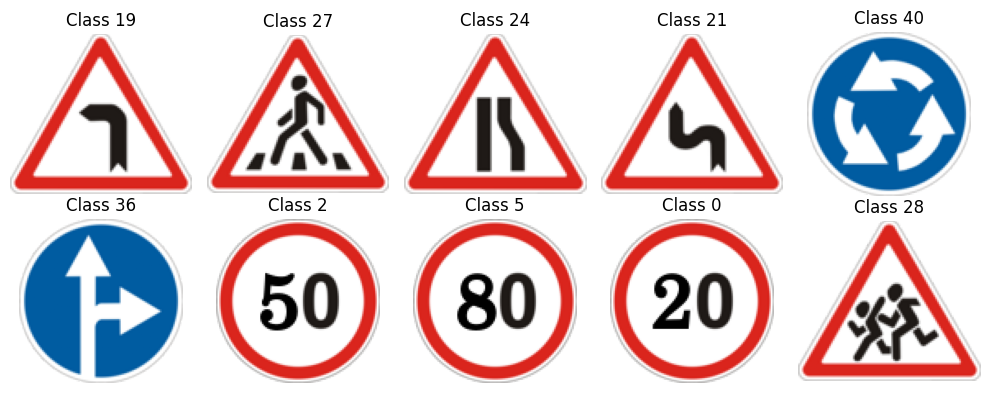


Fold 2 Accuracy: 0.9372


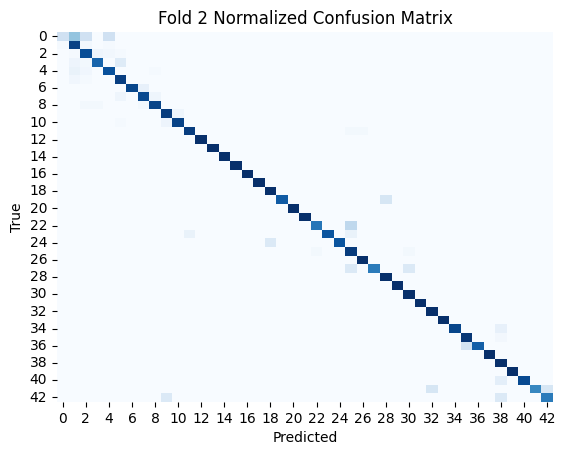

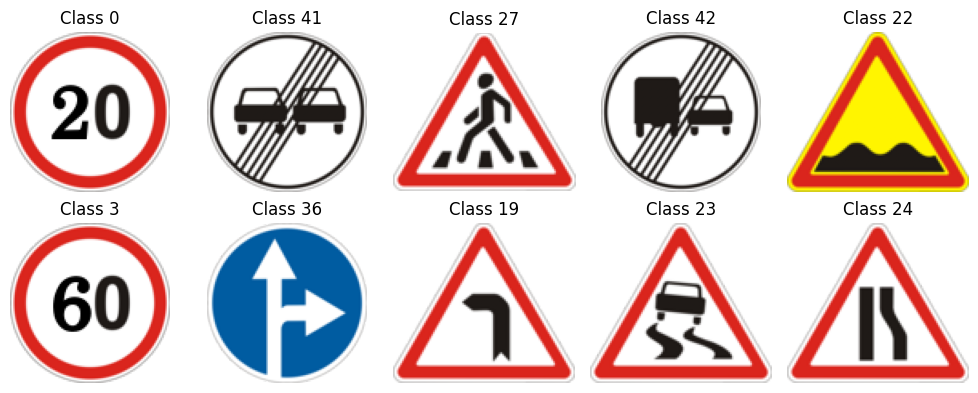


Fold 3 Accuracy: 0.9317


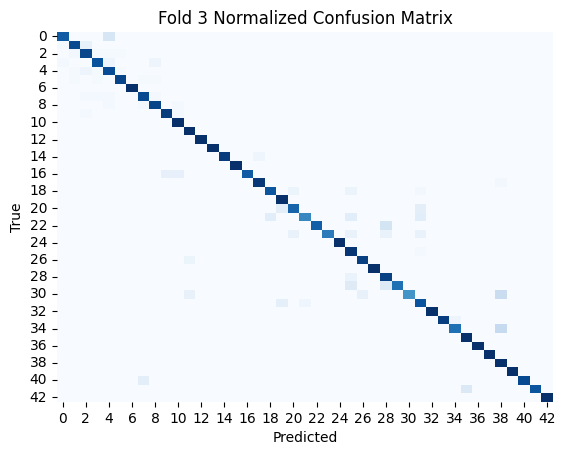

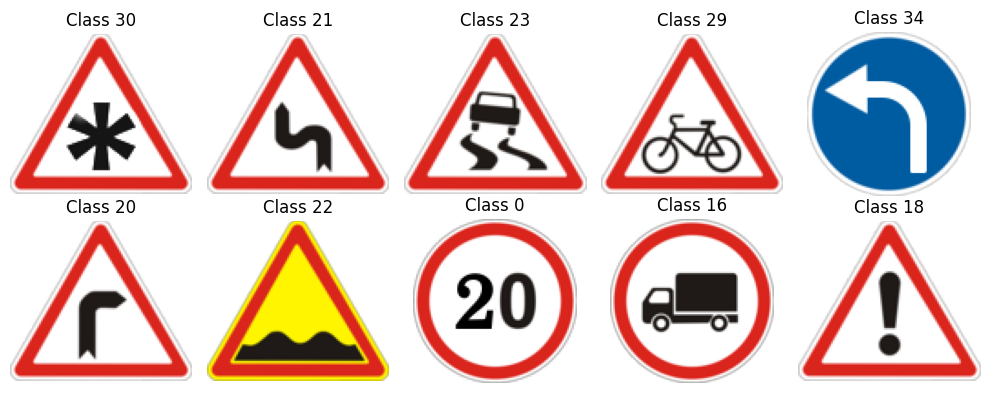


Fold 4 Accuracy: 0.9407


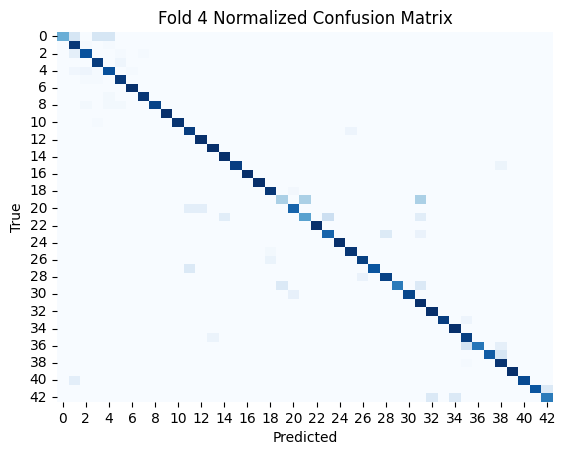

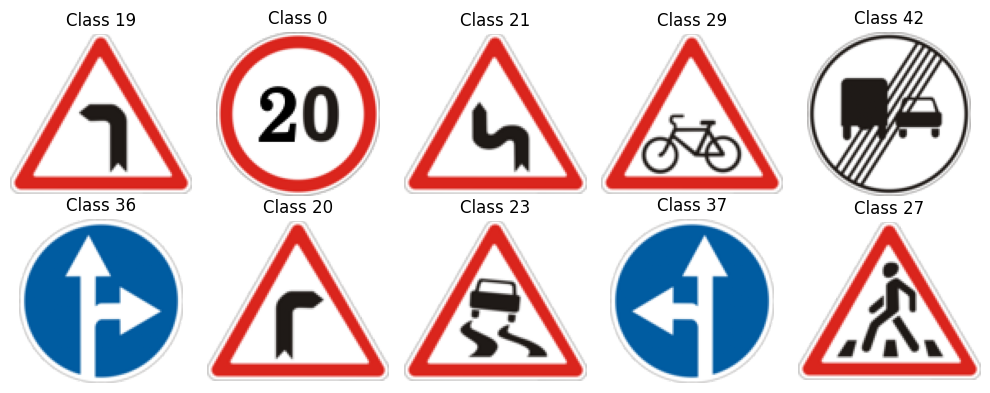


Fold 5 Accuracy: 0.9407


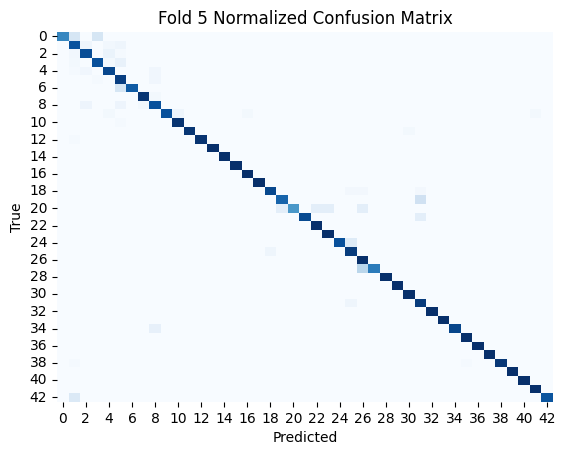

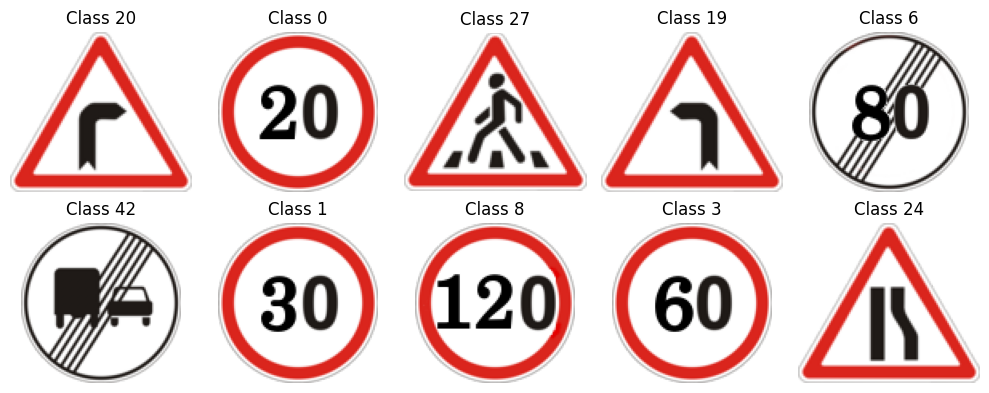

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

def printSigns(accuracies, top_n, reverse=False):
    if reverse:
        accuracies = list(reversed(accuracies))
    plt.figure(figsize=(top_n, 4))
    for i in range(top_n):
        classID = accuracies[i][1]
        plt.subplot(2, top_n // 2, i + 1)
        img = mpimg.imread(f'../Sign Images/{classID}.png')
        plt.imshow(img)
        plt.title(f'Class {classID}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

X = merged_df.drop(['image_path', 'ClassId'], axis=1).values
y = merged_df['ClassId'].values

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
accuracies = []

for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)


    clf = MLPClassifier(hidden_layer_sizes=(500,), max_iter=300, random_state=50)
    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print(f"\nFold {fold_idx} Accuracy: {acc:.4f}")


    cm = confusion_matrix(y_val, y_pred, normalize='true')
    sns.heatmap(cm, cmap="Blues", cbar=False)
    plt.title(f"Fold {fold_idx} Normalized Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


    class_accuracies = sorted((cm[i][i], i) for i in range(cm.shape[0]))
    printSigns(class_accuracies, top_n=10, reverse=False)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = merged_df.drop(['image_path', 'ClassId'], axis=1).values
y = merged_df['ClassId'].values

hidden_layer_configs = [
    (1000,),
    (500,),
    (250,),
    (125,),
    (60,)
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)

results = {}

for config in hidden_layer_configs:
    print(f"\nEvaluating hidden_layer_sizes={config}")
    fold_accuracies = []

    for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]


        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)


        clf = MLPClassifier(hidden_layer_sizes=config, max_iter=300, random_state=50)
        clf.fit(X_train, y_train)


        y_pred = clf.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        fold_accuracies.append(acc)
        print(f"  Fold {fold_idx} Accuracy: {acc:.4f}")

    results[config] = {
        "mean": np.mean(fold_accuracies),
        "std": np.std(fold_accuracies),
        "folds": fold_accuracies
    }

print("\nSummary of Hidden Layer Performance:")
for config, stats in results.items():
    print(f"Hidden Layers {config}: Mean Accuracy = {stats['mean']:.4f}, Std = {stats['std']:.4f}")


Evaluating hidden_layer_sizes=(1000,)
  Fold 1 Accuracy: 0.9408
  Fold 2 Accuracy: 0.9417
  Fold 3 Accuracy: 0.9326
  Fold 4 Accuracy: 0.9407
  Fold 5 Accuracy: 0.9453

Evaluating hidden_layer_sizes=(500,)
  Fold 1 Accuracy: 0.9390
  Fold 2 Accuracy: 0.9372
  Fold 3 Accuracy: 0.9317
  Fold 4 Accuracy: 0.9407
  Fold 5 Accuracy: 0.9407

Evaluating hidden_layer_sizes=(250,)
  Fold 1 Accuracy: 0.9353
  Fold 2 Accuracy: 0.9353
  Fold 3 Accuracy: 0.9290
  Fold 4 Accuracy: 0.9325
  Fold 5 Accuracy: 0.9389

Evaluating hidden_layer_sizes=(125,)
  Fold 1 Accuracy: 0.9353
  Fold 2 Accuracy: 0.9290
  Fold 3 Accuracy: 0.9235
  Fold 4 Accuracy: 0.9271
  Fold 5 Accuracy: 0.9426

Evaluating hidden_layer_sizes=(60,)
  Fold 1 Accuracy: 0.9281
  Fold 2 Accuracy: 0.9271
  Fold 3 Accuracy: 0.9217
  Fold 4 Accuracy: 0.9207
  Fold 5 Accuracy: 0.9225

Summary of Hidden Layer Performance:
Hidden Layers (1000,): Mean Accuracy = 0.9402, Std = 0.0042
Hidden Layers (500,): Mean Accuracy = 0.9379, Std = 0.0034
Hid